In [1]:
import numpy as np
import pandas as pd
from sodapy import Socrata

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

total_record = 9362925
selected_record = 936292
selected_record/total_record*100

In [43]:
model_feature_raw = ['Borough', 'City', 'Created Date',
       'Incident Zip', 'Latitude', 'Longitude', 'Complaint Type']

In [20]:
df = pd.read_csv('Data/311_Service_Requests_from_2015.csv')
df.shape

(2282093, 53)

In [19]:
total_record = 9362925
selected_record = len(df)
selected_record/total_record*100

24.373718682997033

In [30]:
df = df[model_feature]
df.shape

(2282093, 7)

In [37]:
model_feature = ['borough', 'city', 'created_date',
       'incident_zip', 'latitude', 'longitude', 'complaint_type']

In [41]:
i = 0
for n in df.columns:
    print('\'{}\''.format(n), end=': \'{}\', '.format(model_feature[i]))
    i+=1

'Borough': 'borough', 'City': 'city', 'Created Date': 'created_date', 'Incident Zip': 'incident_zip', 'Latitude': 'latitude', 'Longitude': 'longitude', 'Complaint Type': 'complaint_type', 

In [42]:
df = df.rename(columns={'Borough': 'borough', 'City': 'city', 
                        'Created Date': 'created_date', 
                        'Incident Zip': 'incident_zip', 'Latitude': 'latitude', 
                        'Longitude': 'longitude', 
                        'Complaint Type': 'complaint_type'})

## Missing Values

In [45]:
df.isnull().sum()/len(df)*100

borough            0.000000
city               7.318326
created_date       0.000000
incident_zip       7.337650
latitude          10.280738
longitude         10.280738
complaint_type     0.000000
dtype: float64

In [46]:
df = df.dropna()

## Datatypes

In [48]:
df.dtypes

borough            object
city               object
created_date       object
incident_zip       object
latitude          float64
longitude         float64
complaint_type     object
dtype: object

In [49]:
df['created_date'] = pd.to_datetime(df['created_date'])
#df['latitude'] = df['latitude'].astype(float)
#df['longitude'] = df['longitude'].astype(float)
df['city'] = df['city'].apply(lambda x:x.upper())


In [63]:
df.incident_zip = df.incident_zip.astype(int)

#### Zipcodes

In [6]:
zipcodes = []
with open('Data/NYCzipcodes_raw.txt') as file:
    zipcodes_raw = file.read()
for i, z in enumerate(zipcodes_raw.split()):
    if i%2==0:
        zipcodes.append(z)

In [50]:
_ = len(df.incident_zip.unique())
print(_, 'unique zipcodes in database')

418 unique zipcodes in database


In [52]:
count = 0
for z in df.incident_zip.unique():
    if z in zipcodes:
        count+=1
print(count, 'valid zipcodes')

195 valid zipcodes


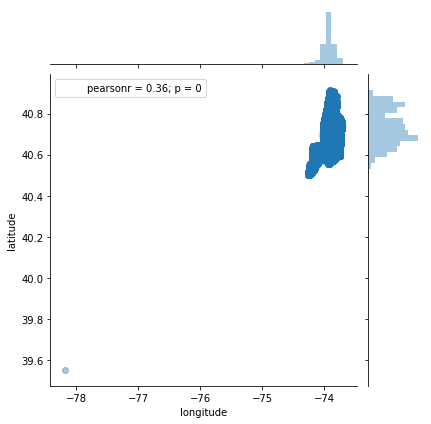

In [53]:
sns.jointplot(df.longitude, df.latitude, alpha=.15)

In [55]:
df.describe()

,latitude,longitude
count,2.047062e+06,2.047062e+06
mean,4.073159e+01,-7.392431e+01
std,8.645123e-02,8.023125e-02
min,3.955256e+01,-7.818451e+01
25%,4.066794e+01,-7.396659e+01
50%,4.072394e+01,-7.392792e+01
75%,4.081081e+01,-7.387896e+01
max,4.091287e+01,-7.370029e+01


In [58]:
df.borough.value_counts()

BROOKLYN         645808
QUEENS           477782
MANHATTAN        437131
BRONX            385562
STATEN ISLAND    100771
Unspecified           8
Name: borough, dtype: int64

In [67]:
df = df.loc[df.incident_zip>=10000]
df = df.loc[df.borough!='Unspecified']
df.shape

(2046937, 7)

### Parsing Dates

In [7]:
df['created_date_year'] = df['created_date'].dt.year
df['created_date_month'] = df['created_date'].dt.month
df['created_date_dayofmonth'] = df['created_date'].dt.day
df['created_date_dayofweek'] = df['created_date'].dt.dayofweek
df['created_date_hour'] = df['created_date'].dt.hour

In [9]:
df.dtypes

borough                            object
city                               object
created_date               datetime64[ns]
incident_zip                        int64
latitude                          float64
longitude                         float64
complaint_type                     object
created_date_year                   int64
created_date_month                  int64
created_date_dayofmonth             int64
created_date_dayofweek              int64
created_date_hour                   int64
dtype: object

### Create Target

In [11]:
top_complaints = df.complaint_type.value_counts()[
    df.complaint_type.value_counts()>df.complaint_type.value_counts().mean()]

In [17]:
top_complaints.head(10)

HEAT/HOT WATER            225042
Noise - Residential       205824
Street Condition          118439
Blocked Driveway          100191
Illegal Parking            90853
UNSANITARY CONDITION       82718
PAINT/PLASTER              69557
Water System               69213
Street Light Condition     58627
Noise                      56308
Name: complaint_type, dtype: int64

In [18]:
top_complaints.head(10).index

Index(['HEAT/HOT WATER', 'Noise - Residential', 'Street Condition',
       'Blocked Driveway', 'Illegal Parking', 'UNSANITARY CONDITION',
       'PAINT/PLASTER', 'Water System', 'Street Light Condition', 'Noise'],
      dtype='object')

In [20]:
topics = top_complaints.head(10).index
df.complaint_type = df.complaint_type.apply(lambda x: x if x in topics else 'Others')

In [22]:
df.complaint_type.value_counts()/len(df)*100

Others                    47.395938
HEAT/HOT WATER            10.994085
Noise - Residential       10.055219
Street Condition           5.786158
Blocked Driveway           4.894679
Illegal Parking            4.438485
UNSANITARY CONDITION       4.041062
PAINT/PLASTER              3.398102
Water System               3.381296
Street Light Condition     2.864133
Noise                      2.750842
Name: complaint_type, dtype: float64

In [23]:
df.to_pickle('Data/ML_2015.pkl')